In [330]:
import pandas as pd
import numpy as np 
import datetime 
import pandas_datareader as pdr
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [331]:
df = pd.read_excel("C:\\Users\\user_a0068\\Documents\\data_j.xls")

In [332]:
df

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20240329,1301,極洋,プライム（内国株式）,50,水産・農林業,1,食品,7,TOPIX Small 2
1,20240329,1305,ｉＦｒｅｅＥＴＦ ＴＯＰＩＸ（年１回決算型）,ETF・ETN,-,-,-,-,-,-
2,20240329,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-,-,-,-,-
3,20240329,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-,-,-,-,-
4,20240329,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
4349,20240329,9993,ヤマザワ,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4350,20240329,9994,やまや,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4351,20240329,9995,グローセル,プライム（内国株式）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
4352,20240329,9996,サトー商会,スタンダード（内国株式）,6050,卸売業,13,商社・卸売,-,-


1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633

In [333]:
etf_list = [1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633]

In [334]:
tiker_list = etf_list
tiker_list.append(1321)
tiker_list_small = tiker_list

for文の中でdateも毎月毎に丸める（月のcloseを代入していく）

In [335]:
data = []

for ticker in tiker_list_small:
    tickers = str(ticker)+'.T'
    f_ticker = yf.Ticker(tickers)
    # print(f_ticker)
    hist = f_ticker.history(period="max")
    hist['ticker'] = ticker
    # print(hist)
    data.append(hist)
    # print(hist)
    # break

In [336]:
df = pd.concat(data)
df = df.reset_index()

In [337]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%Y-%m-%d")
df['Date'] = pd.to_datetime(df['Date'])

In [338]:

# last_date = df['Date'].apply(lambda x: x + relativedelta(months=1, day=1) - relativedelta(days=1))
# last_date_list = last_date.unique()

In [339]:
df['Date'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))
df = df.groupby(['ticker']).apply(lambda x: x.drop_duplicates(subset='Date', keep='last'))

In [340]:
df

Date          Open          High           Low  \
ticker                                                              
1321   71554 2009-01-01      0.000000   6920.499408   6810.650211   
       71573 2009-02-01   6523.352539   6523.352539   6523.352539   
       71594 2009-03-01      0.000000   7275.396869   6996.548905   
       71615 2009-04-01      0.000000   7680.994629   7588.045299   
       71633 2009-05-01      0.000000   8238.689916   8171.090409   
...                 ...           ...           ...           ...   
1633   71469 2024-02-01  37500.000000  37650.000000  37220.000000   
       71489 2024-03-01  43420.000000  46300.000000  43420.000000   
       71510 2024-04-01  43330.000000  43420.000000  42830.000000   
       71531 2024-05-01  39040.000000  40440.000000  39040.000000   
       71535 2024-06-01  41150.000000  41150.000000  40600.000000   

                     Close  Volume  Dividends  Stock Splits  Capital Gains  \
ticker                                                                       
1321   71554   6852.899902  885125        0.0           0.0            0.0   
       71573   6523.352539       0        0.0           0.0            0.0   
       71594   7047.248535  865254        0.0           0.0            0.0   
       71615   7680.994629  914857        0.0           0.0            0.0   
       71633   8221.790039  436598        0.0           0.0            0.0   
...                    ...     ...        ...           ...            ...   
1633   71469  37420.000000     135        0.0           0.0            0.0   
       71489  43870.000000    1989        0.0           0.0            0.0   
       71510  43190.000000    1307        0.0           0.0            0.0   
       71531  40150.000000     556        0.0           0.0            0.0   
       71535  40600.000000     529        0.0           0.0            0.0   

              ticker  
ticker                
1321   71554    1321  
       71573    1321  
       71594    1321  
       71615    1321  
       71633    1321  
...              ...  
1633   71469    1633  
       71489    1633  
       71510    1633  
       71531    1633  
       71535    1633  

[3704 rows x 10 columns]

In [341]:
df.reset_index(drop=True, inplace=True)
del df['Open']

In [342]:
del df['High']
del df['Low']
del df['Volume']
del df['Stock Splits']
del df['Dividends']
del df['Capital Gains']

In [343]:
df

,Date,Close,ticker
0,2009-01-01,6852.899902,1321
1,2009-02-01,6523.352539,1321
2,2009-03-01,7047.248535,1321
3,2009-04-01,7680.994629,1321
4,2009-05-01,8221.790039,1321
...,...,...,...
3699,2024-02-01,37420.000000,1633
3700,2024-03-01,43870.000000,1633
3701,2024-04-01,43190.000000,1633
3702,2024-05-01,40150.000000,1633


drop_duplicates()を銘柄ごとに行えばいい。  
日付けを月に丸めて、ドロップすればいい。キープラストをすればそれで最後の列だけ勝手にのこる

In [344]:
# last_date_list

In [345]:
# date_list = []
# for d in last_date_list:
#     a = df[df['Date'] == d]
#     print(a)
#     date_list.append(a)
# df = pd.concat(date_list)
# df = df[['Date', 'Close', 'ticker']]

In [346]:
df['ticker'].unique()

array([1321, 1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625,
       1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633], dtype=int64)

In [347]:
# df = df[~dd['ticker'].isin(['132A', '131A', '130A'])]

In [348]:
df['lag_close'] = df.groupby(['ticker'])['Close'].shift(1)
df['performance'] = round((df['Close'] - df['lag_close']) / df['lag_close'] * 100, 1)
df['year'] = df['Date'].dt.year
df

,Date,Close,ticker,lag_close,performance,year
0,2009-01-01,6852.899902,1321,NaN,NaN,2009
1,2009-02-01,6523.352539,1321,6852.899902,-4.8,2009
2,2009-03-01,7047.248535,1321,6523.352539,8.0,2009
3,2009-04-01,7680.994629,1321,7047.248535,9.0,2009
4,2009-05-01,8221.790039,1321,7680.994629,7.0,2009
...,...,...,...,...,...,...
3699,2024-02-01,37420.000000,1633,36340.000000,3.0,2024
3700,2024-03-01,43870.000000,1633,37420.000000,17.2,2024
3701,2024-04-01,43190.000000,1633,43870.000000,-1.6,2024
3702,2024-05-01,40150.000000,1633,43190.000000,-7.0,2024


In [349]:
df_year = df.copy()
df_year['year'] = df_year['Date'].dt.year
df_year = df_year.groupby(['ticker']).apply(lambda x: x.drop_duplicates(subset='year', keep='last'))
df_year

Date         Close  ticker     lag_close  performance  year
ticker                                                                       
1321   11   2009-12-01   8990.733398    1321   7959.842285         13.0  2009
       23   2010-12-01   8711.884766    1321   8483.737305          2.7  2010
       35   2011-12-01   7241.596680    1321   7199.347168          0.6  2011
       47   2012-12-01   8982.284180    1321   8137.290527         10.4  2012
       59   2013-12-01  14227.024414    1321  13653.491211          4.2  2013
...                ...           ...     ...           ...          ...   ...
1633   3661 2020-12-01  24604.593750    1633  25149.275391         -2.2  2020
       3673 2021-12-01  26268.353516    1633  26325.625000         -0.2  2021
       3685 2022-12-01  27421.138672    1633  30310.134766         -9.5  2022
       3697 2023-12-01  33900.000000    1633  34160.000000         -0.8  2023
       3703 2024-06-01  40600.000000    1633  40150.000000          1.1  2024

[321 rows x 6 columns]

In [350]:
df_year = df_year.reset_index(drop=True)


In [351]:
df_year['lag_close'] = df_year.groupby(['ticker'])['Close'].shift(1)
df_year['year_per'] = round((df_year['Close'] - df_year['lag_close']) / df_year['lag_close'] * 100, 1)
display(df_year)


,Date,Close,ticker,lag_close,performance,year,year_per
0,2009-12-01,8990.733398,1321,NaN,13.0,2009,NaN
1,2010-12-01,8711.884766,1321,8990.733398,2.7,2010,-3.1
2,2011-12-01,7241.596680,1321,8711.884766,0.6,2011,-16.9
3,2012-12-01,8982.284180,1321,7241.596680,10.4,2012,24.0
4,2013-12-01,14227.024414,1321,8982.284180,4.2,2013,58.4
...,...,...,...,...,...,...,...
316,2020-12-01,24604.593750,1633,28378.609375,-2.2,2020,-13.3
317,2021-12-01,26268.353516,1633,24604.593750,-0.2,2021,6.8
318,2022-12-01,27421.138672,1633,26268.353516,-9.5,2022,4.4
319,2023-12-01,33900.000000,1633,27421.138672,-0.8,2023,23.6


In [352]:
df_year_pivot = df_year.pivot(index='year', columns='ticker', values='year_per')

In [353]:
df_year_pivot

ticker,1321,1328,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633
year,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,2.6,-5.5,8.6,7.6,-9.8,50.3,20.7,21.7,36.7,-11.6,-21.0,-17.7,22.6,-11.6,-28.1,-11.8,0.9
2010,-3.1,11.4,-11.3,5.6,-0.5,0.8,-5.0,-6.6,-7.0,5.3,-0.5,2.1,-9.0,-3.7,2.5,-1.3,-2.1,-8.7,4.2
2011,-16.9,8.5,0.8,-9.4,-10.1,-15.1,-7.1,-19.6,-32.3,-17.3,-25.9,-11.7,-42.8,-11.0,-13.5,1.2,-21.7,-34.8,-26.3
2012,24.0,14.8,18.8,-1.2,22.5,8.0,12.3,39.2,8.0,21.3,6.9,8.0,-9.8,10.6,12.8,10.6,30.8,56.6,80.9
2013,58.4,-14.8,41.0,23.1,49.9,41.8,40.8,58.1,55.7,56.6,52.4,79.2,37.2,39.5,30.5,56.3,53.0,67.4,71.2
2014,8.8,8.6,19.1,-2.4,11.0,26.0,18.2,14.2,0.2,12.6,20.3,4.2,7.9,21.9,10.2,7.9,-0.8,-2.8,-15.3
2015,10.6,-6.4,27.4,-0.7,17.9,14.7,33.2,6.1,-10.1,-4.3,4.2,21.1,11.0,16.7,5.9,31.5,11.0,15.5,-3.0
2016,2.1,0.0,-2.7,4.8,4.3,5.1,-8.8,-6.5,1.9,8.7,1.9,3.4,-10.7,-6.8,10.0,-5.7,-5.9,-2.0,-7.2


In [354]:
df_pivot = df.pivot(index='Date', columns='ticker', values='performance')

<Axes: xlabel='Date'>

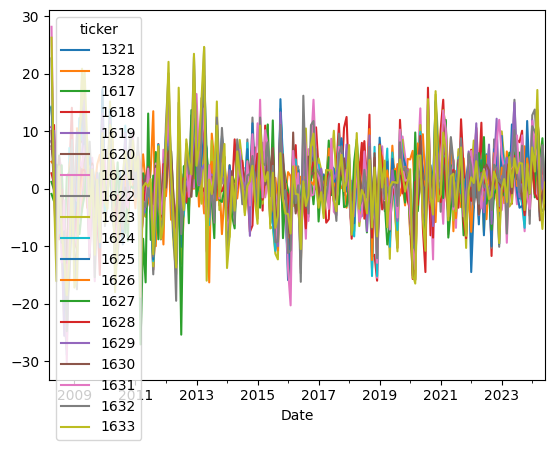

In [355]:
df_pivot.plot()

In [356]:
df_pivot = df_pivot.reset_index()
df_pivot

ticker,Date,1321,1328,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633
0,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-04-01,NaN,NaN,1.2,10.7,8.2,7.4,6.9,8.3,14.2,14.3,14.1,4.7,-0.9,2.7,10.8,10.1,28.2,22.7,26.3
2,2008-05-01,NaN,NaN,-0.2,11.1,10.1,3.9,7.9,4.2,6.9,6.9,6.0,4.1,-2.2,0.8,8.5,-1.0,-1.3,0.7,-1.6
3,2008-06-01,NaN,NaN,-2.8,-3.4,-6.5,-6.2,-4.1,-4.8,-8.6,-7.9,-6.7,-2.9,4.2,0.2,-5.7,-5.3,-10.9,-11.0,-16.1
4,2008-07-01,NaN,NaN,5.8,-8.8,-3.7,-1.6,5.3,-6.0,1.2,-7.7,-5.5,-1.2,3.6,-2.0,-5.9,5.5,2.4,1.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2024-02-01,8.0,1.5,-1.0,5.4,2.2,2.6,4.6,13.8,4.5,6.3,5.1,2.6,-1.5,-0.8,6.3,5.2,7.3,10.0,3.0
192,2024-03-01,3.6,12.3,2.9,13.7,7.5,3.8,-1.3,5.9,6.2,6.6,2.5,1.2,13.0,-1.8,6.3,4.6,5.8,8.9,17.2
193,2024-04-01,-4.9,6.2,1.3,2.0,0.3,-1.2,1.2,-2.7,1.1,-1.8,-1.3,-4.1,4.4,-1.5,5.2,-5.5,1.6,-0.7,-1.6
194,2024-05-01,0.3,0.9,-0.5,3.9,-1.5,-0.0,0.0,-3.9,1.1,1.5,1.3,2.3,8.8,-1.1,-0.1,-0.7,7.4,7.6,-7.0


In [357]:
df_pivot['year'] = df_pivot['Date'].dt.year

In [358]:
drop_columns = ['Date', 'year']
df_pivot_year = df_pivot.groupby('year')[[col for col in df_pivot.columns if col not in drop_columns]].sum()

In [359]:
df_pivot_year['max'] = df_pivot_year.max(axis=1)
df_pivot_year['min'] = df_pivot_year.min(axis=1)

In [360]:
df_pivot_year.reset_index(inplace=True)
df_pivot_year

ticker,year,1321,1328,1617,1618,1619,1620,1621,1622,1623,...,1626,1627,1628,1629,1630,1631,1632,1633,max,min
0,2008,0.0,0.0,-21.3,-21.7,-21.9,-27.7,0.1,-49.9,-47.1,...,-14.9,8.4,-18.1,-55.1,-4.9,-23.7,-33.9,-36.0,8.4,-55.1
1,2009,29.5,18.3,4.7,-1.0,12.0,10.2,-8.7,45.3,23.6,...,-10.8,-22.7,-18.0,23.7,-9.3,-29.4,-6.4,9.5,45.3,-29.4
2,2010,-0.9,11.6,-10.4,8.4,1.8,2.9,-4.6,-4.5,-3.9,...,3.2,-8.7,-3.3,4.9,0.5,0.1,-5.6,8.1,11.6,-10.4
3,2011,-17.4,10.9,1.5,-7.8,-9.7,-15.6,-6.5,-19.5,-36.6,...,-11.9,-47.6,-10.8,-13.7,2.0,-22.6,-40.0,-26.8,10.9,-47.6
4,2012,24.0,15.0,18.4,1.0,23.5,10.0,12.9,37.8,13.9,...,9.1,-4.1,11.1,13.9,10.9,31.4,53.9,67.3,67.3,-4.1
5,2013,48.2,-13.4,36.0,22.3,42.8,36.7,36.9,48.2,47.2,...,61.1,35.3,35.5,27.9,47.6,46.1,56.3,60.3,61.1,-13.4
6,2014,9.5,8.5,17.9,-1.0,11.1,23.9,17.2,14.9,1.6,...,4.8,8.9,20.6,10.7,8.3,0.6,-1.1,-14.5,23.9,-14.5
7,2015,11.8,-6.2,26.0,1.8,17.4,15.3,31.4,7.8,-6.6,...,20.9,13.3,17.1,8.3,28.8,13.5,17.3,-1.3,31.4,-6.6
8,2016,4.0,0.2,-1.9,7.8,6.1,6.8,-8.1,-2.3,5.6,...,4.2,-10.2,-6.0,10.9,-4.2,1.1,3.3,-5.5,10.9,-10.2
9,2017,20.0,7.0,18.9,38.5,27.2,30.0,14.1,13.0,33.7,...,21.1,-2.2,12.2,29.6,17.1,11.4,12.5,4.5,38.5,-2.2


In [361]:
df_pivot_year.rename(columns={1321: '225',
                              1328: '円建て金',
                              1617: '食品',
                              1618: 'エネルギー資源',
                              1619: '建設_資材',
                              1620: '素材_化学',
                              1621: '医薬品',
                              1622: '自動車_輸送機',
                              1623: '鉄鋼_非鉄',
                              1624: '機械',
                              1625: '電機_精密',
                              1626: '情報通信_サービス',
                              1627: '電力_ガス',
                              1628: '運輸_物流',
                              1629: '商社_卸売',
                              1630: '小売',
                              1631: '銀行',
                              1632: '金融_除く銀行',
                              1633: '不動産'
                              }, inplace=True)

In [362]:

def find_matching_columns(row):
    matches = []
    for col in df_pivot_year.columns:
        # print(col)
        if row['max'] == row[col]:
            matches.append(col)
    return matches


df_pivot_year['match_max'] = df_pivot_year.apply(find_matching_columns, axis=1)
df_pivot_year

ticker,year,225,円建て金,食品,エネルギー資源,建設_資材,素材_化学,医薬品,自動車_輸送機,鉄鋼_非鉄,...,電力_ガス,運輸_物流,商社_卸売,小売,銀行,金融_除く銀行,不動産,max,min,match_max
0,2008,0.0,0.0,-21.3,-21.7,-21.9,-27.7,0.1,-49.9,-47.1,...,8.4,-18.1,-55.1,-4.9,-23.7,-33.9,-36.0,8.4,-55.1,"[電力_ガス, max]"
1,2009,29.5,18.3,4.7,-1.0,12.0,10.2,-8.7,45.3,23.6,...,-22.7,-18.0,23.7,-9.3,-29.4,-6.4,9.5,45.3,-29.4,"[自動車_輸送機, max]"
2,2010,-0.9,11.6,-10.4,8.4,1.8,2.9,-4.6,-4.5,-3.9,...,-8.7,-3.3,4.9,0.5,0.1,-5.6,8.1,11.6,-10.4,"[円建て金, max]"
3,2011,-17.4,10.9,1.5,-7.8,-9.7,-15.6,-6.5,-19.5,-36.6,...,-47.6,-10.8,-13.7,2.0,-22.6,-40.0,-26.8,10.9,-47.6,"[円建て金, max]"
4,2012,24.0,15.0,18.4,1.0,23.5,10.0,12.9,37.8,13.9,...,-4.1,11.1,13.9,10.9,31.4,53.9,67.3,67.3,-4.1,"[不動産, max]"
5,2013,48.2,-13.4,36.0,22.3,42.8,36.7,36.9,48.2,47.2,...,35.3,35.5,27.9,47.6,46.1,56.3,60.3,61.1,-13.4,"[情報通信_サービス, max]"
6,2014,9.5,8.5,17.9,-1.0,11.1,23.9,17.2,14.9,1.6,...,8.9,20.6,10.7,8.3,0.6,-1.1,-14.5,23.9,-14.5,"[素材_化学, max]"
7,2015,11.8,-6.2,26.0,1.8,17.4,15.3,31.4,7.8,-6.6,...,13.3,17.1,8.3,28.8,13.5,17.3,-1.3,31.4,-6.6,"[医薬品, max]"
8,2016,4.0,0.2,-1.9,7.8,6.1,6.8,-8.1,-2.3,5.6,...,-10.2,-6.0,10.9,-4.2,1.1,3.3,-5.5,10.9,-10.2,"[商社_卸売, max]"
9,2017,20.0,7.0,18.9,38.5,27.2,30.0,14.1,13.0,33.7,...,-2.2,12.2,29.6,17.1,11.4,12.5,4.5,38.5,-2.2,"[エネルギー資源, max]"


In [363]:
df_pivot_year['match_max']

0         [電力_ガス, max]
1       [自動車_輸送機, max]
2          [円建て金, max]
3          [円建て金, max]
4           [不動産, max]
5     [情報通信_サービス, max]
6         [素材_化学, max]
7           [医薬品, max]
8         [商社_卸売, max]
9       [エネルギー資源, max]
10        [電力_ガス, max]
11        [電機_精密, max]
12        [電機_精密, max]
13      [エネルギー資源, max]
14           [銀行, max]
15        [商社_卸売, max]
16      [金融_除く銀行, max]
Name: match_max, dtype: object

In [365]:
import re
df_pivot_year['match_max'] = df_pivot_year['match_max'].apply(lambda x: str(x).split(',')[0].replace('[', ''))
# df_pivot_year['match_max'] = df_pivot_year['match_max'].apply(lambda x: re.sub('^', x, ''))
df_pivot_year['match_max']

0         '電力_ガス'
1       '自動車_輸送機'
2          '円建て金'
3          '円建て金'
4           '不動産'
5     '情報通信_サービス'
6         '素材_化学'
7           '医薬品'
8         '商社_卸売'
9       'エネルギー資源'
10        '電力_ガス'
11        '電機_精密'
12        '電機_精密'
13      'エネルギー資源'
14           '銀行'
15        '商社_卸売'
16      '金融_除く銀行'
Name: match_max, dtype: object

In [367]:
df_pivot_year[['year', 'match_max']]

ticker,year,match_max
0,2008,'電力_ガス'
1,2009,'自動車_輸送機'
2,2010,'円建て金'
3,2011,'円建て金'
4,2012,'不動産'
5,2013,'情報通信_サービス'
6,2014,'素材_化学'
7,2015,'医薬品'
8,2016,'商社_卸売'
9,2017,'エネルギー資源'


本当はここから、ティッカーごとの行するをそろえないと行けない  